In [1]:
# Project\        Disease Symptom Analysis
# Description\    Analyze a dataset linking symptoms to potential diseases, focusing on data cleaning, visualization, and analysis.
# Developers\     {Reham Alharbi},{Esraa Alluqmani},{Lina Alhazmi},{Rawan Almutairi},{shatha Ghabban}
# Supervisor\     {Dr Shurook Almohamade }

In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# محاولة قراءة الملف
try:
    data = pd.read_csv('dataset.csv')
    print("تم تحميل الملف بنجاح!")
except FileNotFoundError:
    print("لم يتم العثور على الملف. تحقق من اسمه أو مساره.")
except pd.errors.EmptyDataError:
    print("الملف فارغ.")
except pd.errors.ParserError:
    print("حدث خطأ أثناء تحليل الملف.")

تم تحميل الملف بنجاح!


In [4]:
sample_data = data.sample(n=1000, random_state=1)  # random_state لتكرار نفس العينة

In [5]:
print(sample_data.dtypes) #نوع البيانات

Disease       object
Symptom_1     object
Symptom_2     object
Symptom_3     object
Symptom_4     object
Symptom_5     object
Symptom_6     object
Symptom_7     object
Symptom_8     object
Symptom_9     object
Symptom_10    object
Symptom_11    object
Symptom_12    object
Symptom_13    object
Symptom_14    object
Symptom_15    object
Symptom_16    object
Symptom_17    object
dtype: object


In [6]:
sample_data = data.sample(n=1000, random_state=1)  

# استكشاف العينة
print("\nأول 5 صفوف من البيانات:")
print(sample_data.head())
print("\nمعلومات عن البيانات:")
print(sample_data.info())
print("\nوصف إحصائي للبيانات:")
print(sample_data.describe())

# معالجة القيم المفقودة
sample_data.fillna(value=sample_data.mean(numeric_only=True), inplace=True)  # استبدال القيم المفقودة بالمتوسط

# إزالة التكرارات
sample_data.drop_duplicates(inplace=True)  # حذف الصفوف المكررة

# تطبيع البيانات (يدويًا باستخدام دالة Min-Max)
# تأكد من وجود الأعمدة قبل التطبيع
for column in ['column1', 'column2']:  # استبدلها بأسماء الأعمدة الصحيحة
    if column in sample_data.columns:
        min_value = sample_data[column].min()
        max_value = sample_data[column].max()
        sample_data[column] = (sample_data[column] - min_value) / (max_value - min_value)

# التأكد من أن البيانات نظيفة
print("\nمعلومات عن البيانات بعد المعالجة:")
print(sample_data.info())
print("\nوصف إحصائي للبيانات بعد المعالجة:")
print(sample_data.describe())

# حفظ البيانات المعالجة إلى ملف CSV جديد
sample_data.to_csv('processed_sample_data.csv', index=False)

print("تمت معالجة البيانات وحفظها في 'processed_sample_data.csv'")


أول 5 صفوف من البيانات:
                      Disease             Symptom_1            Symptom_2  \
2025  Urinary tract infection   burning_micturition   bladder_discomfort   
1724          Gastroenteritis              vomiting          sunken_eyes   
4500           Hypothyroidism               fatigue          weight_gain   
2213              Chicken pox               itching            skin_rash   
4604     Cervical spondylosis             back_pain    weakness_in_limbs   

                  Symptom_3     Symptom_4         Symptom_5  \
2025    foul_smell_of urine           NaN               NaN   
1724              diarrhoea           NaN               NaN   
4500   cold_hands_and_feets   mood_swings          lethargy   
2213               lethargy    high_fever          headache   
4604              neck_pain     dizziness   loss_of_balance   

              Symptom_6             Symptom_7             Symptom_8  \
2025                NaN                   NaN                   NaN 

In [7]:
import pandas as pd
from collections import Counter
import re
data=pd.read_csv('dataset.csv')
sample_data=data.sample(n=1000,random_state=1)
# finding central values,mode
columns=sample_data.select_dtypes(include=['object'])
mode_value=columns.mode().iloc[0]#التكرار لكل عمود
print('mode =',mode_value)



#حساب المتوسط والوسيط

#convert string to numeric value
sample_data['numerical_values']=sample_data['Symptom_1'].astype('category').cat.codes

mean=sample_data['numerical_values'].mean()
median=sample_data['numerical_values'].median()

print('\nmean =',mean)
print('\nmedian =',median)

#calculate the correlation 
sample_data_dum=pd.get_dummies(sample_data)#convert categorical into binary
corr_matrix=sample_data_dum.corr()
print(corr_matrix)

#finding common words
word=re.findall(r'\w+',open('dataset.csv').read().lower())

count=Counter(word).most_common(15)
print('\ncommon symptom : ', count)

#grouping and aggregating data

group=sample_data.groupby('Symptom_1')
sum_dis=group['numerical_values'].sum()
print(sum_dis)


mode = Disease                hepatitis A
Symptom_1                 vomiting
Symptom_2                 vomiting
Symptom_3                  fatigue
Symptom_4               high_fever
Symptom_5               high_fever
Symptom_6                   nausea
Symptom_7           abdominal_pain
Symptom_8           abdominal_pain
Symptom_9        yellowing_of_eyes
Symptom_10       yellowing_of_eyes
Symptom_11            irritability
Symptom_12                 malaise
Symptom_13             muscle_pain
Symptom_14     red_spots_over_body
Symptom_15              chest_pain
Symptom_16         blood_in_sputum
Symptom_17             muscle_pain
Name: 0, dtype: object

mean = 16.333

median = 14.0
                                                 numerical_values  \
numerical_values                                         1.000000   
Disease_(vertigo) Paroymsal  Positional Vertigo          0.177458   
Disease_AIDS                                             0.000264   
Disease_Acne                      

In [8]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [9]:
import matplotlib.pyplot as plt

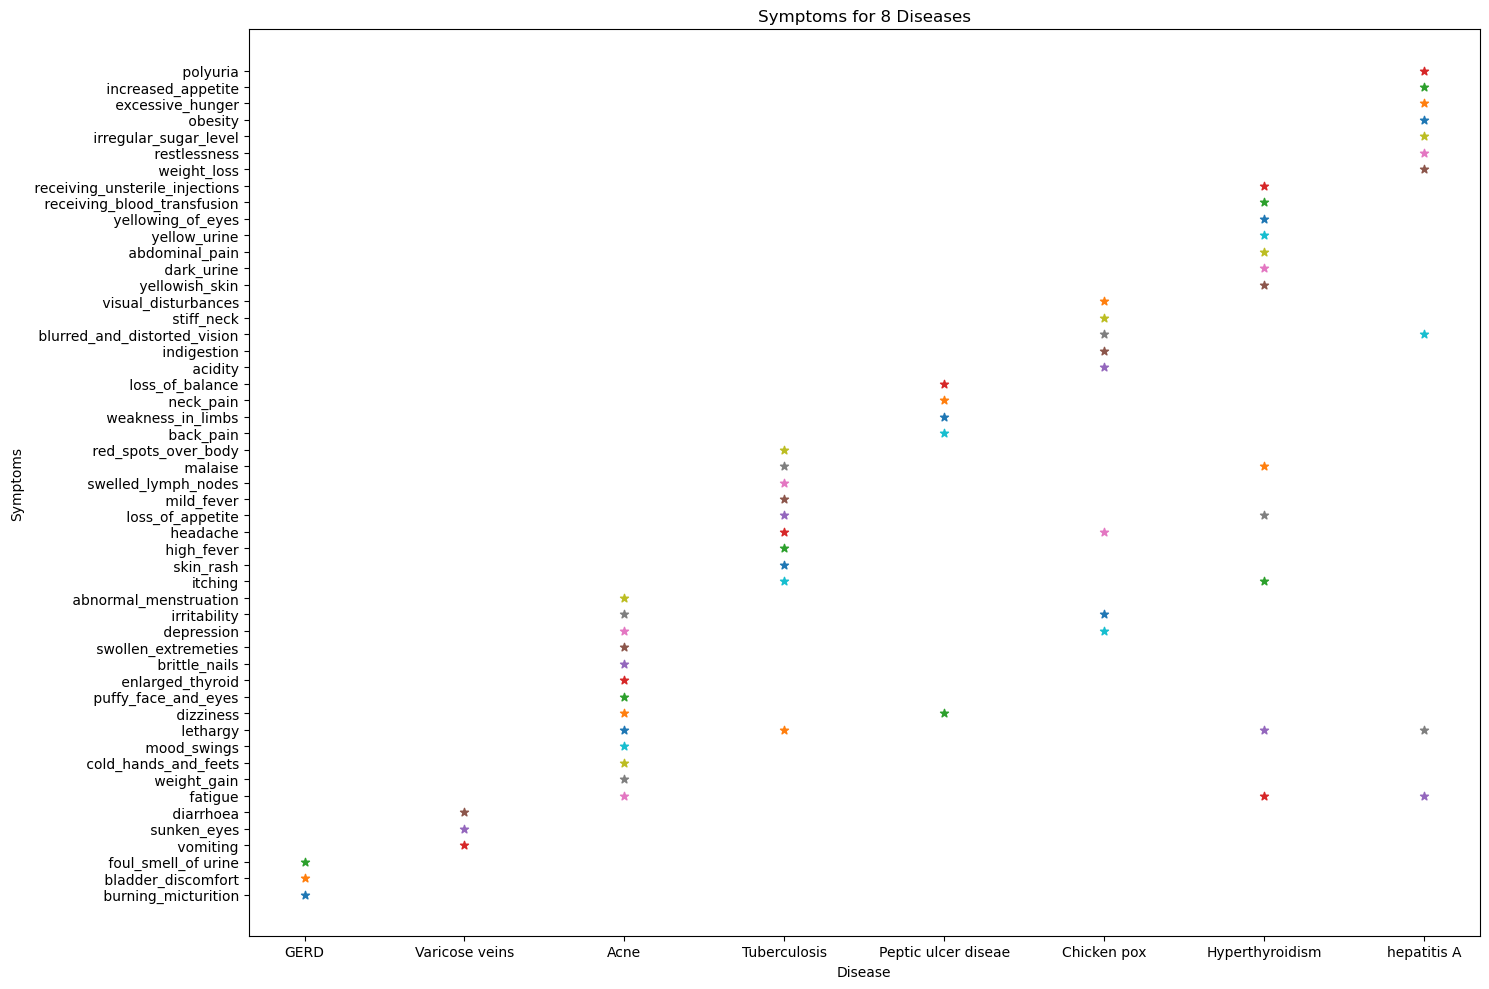

In [10]:
#first visualization - symptoms with diseases
#will show 8 diseases with symptoms

disease_names = sample_data['Disease'][330:338]
symptom_columns = [f'Symptom_{i}' for i in range(1, 18)]

plt.figure(figsize=(15, 10))

for i, disease in enumerate(disease_names):
    symptoms = sample_data[symptom_columns].iloc[i].dropna().tolist()#bring the symptoms from each raw and ignore Nan values

    for symptom in symptoms:
        plt.scatter(disease, symptom, marker='*')#dot the symptoms

plt.xlabel("Disease")
plt.ylabel("Symptoms")
plt.title("Symptoms for 8 Diseases")

plt.tight_layout() #in page border

plt.show()

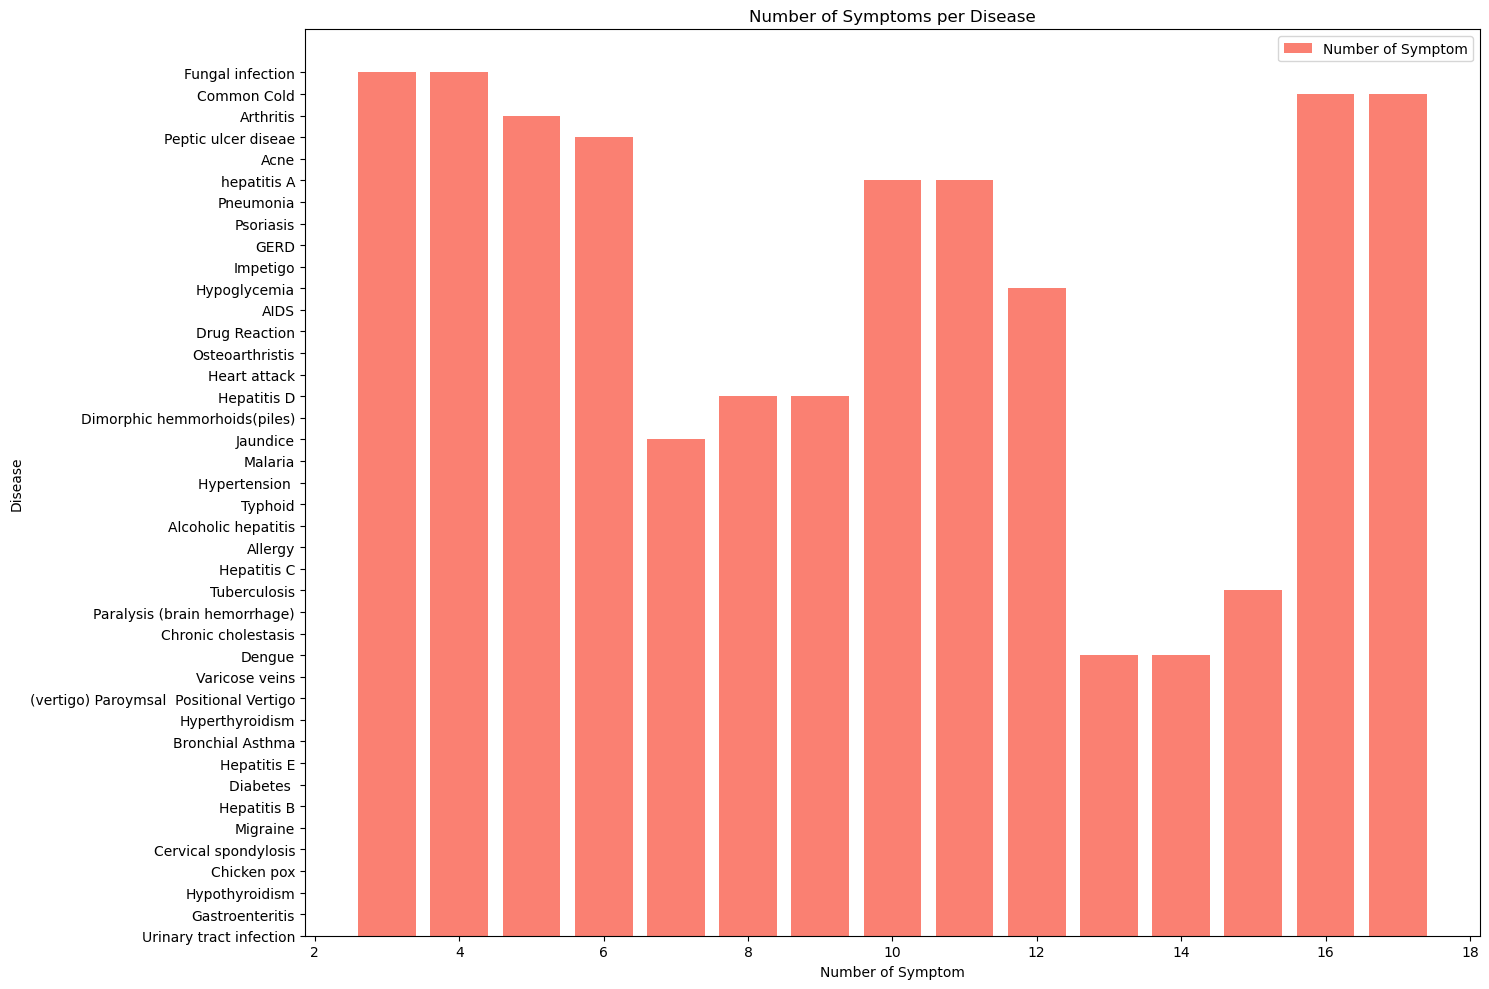

In [11]:
#second visualization - sum of symptoms
plt.figure(figsize=(15,10))

sample_data['Symptom_Count'] = sample_data[symptom_columns].notna().sum(axis=1)#.notna()to deal with Nan
y=sample_data['Disease']
x=sample_data['Symptom_Count']

plt.bar(x,y ,color='salmon',label='Number of Symptom')
plt.xlabel('Number of Symptom')
plt.ylabel('Disease')
plt.title("Number of Symptoms per Disease")

plt.tight_layout()
plt.legend()

plt.show()


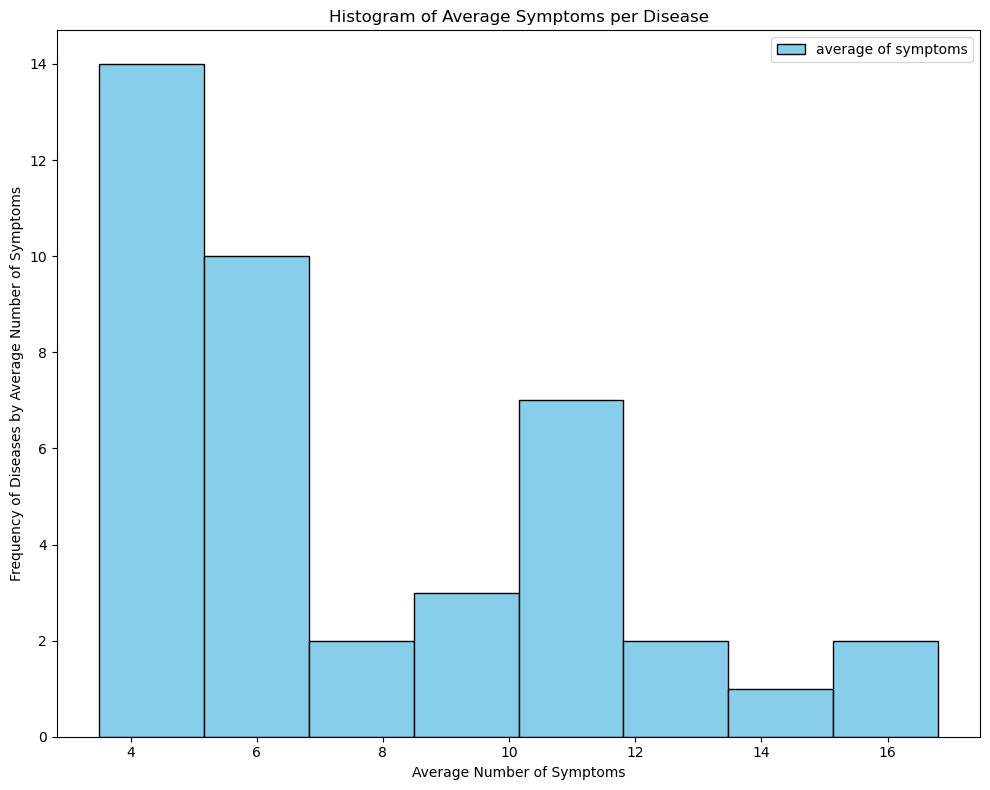

In [12]:
#third visualization - avg symptoms
average_symptoms = sample_data.groupby('Disease')['Symptom_Count'].mean()
plt.figure(figsize=(10,8))
plt.hist(average_symptoms,bins=8,color='skyblue',edgecolor='black',label='average of symptoms')

plt.xlabel("Average Number of Symptoms")
plt.ylabel('Frequency of Diseases by Average Number of Symptoms')
plt.title("Histogram of Average Symptoms per Disease")

plt.tight_layout()
plt.legend()

plt.show()


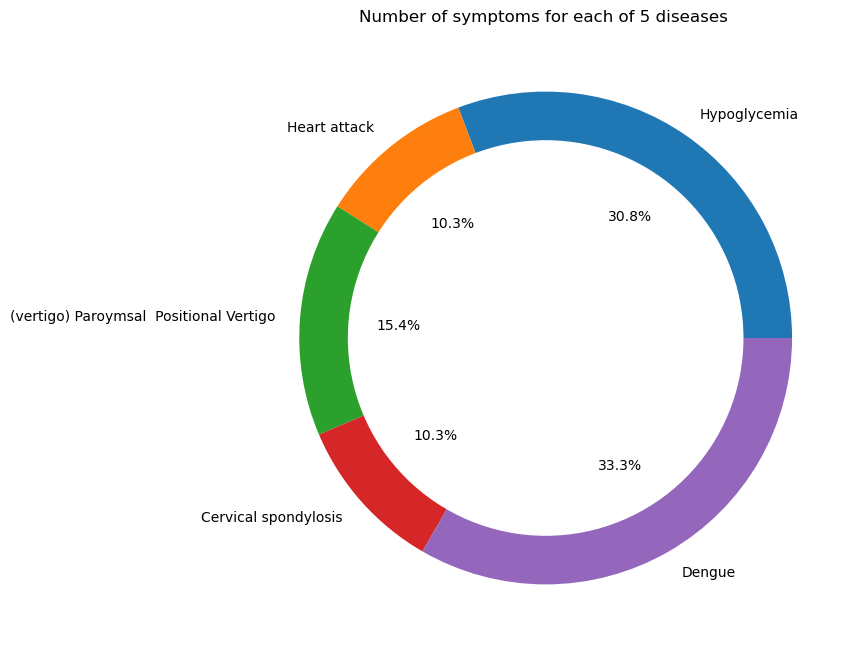

In [13]:
#fourth visualization
#number of symptoms for each for 5 diseases
x=sample_data['Symptom_Count'][750:755]
y=labels=sample_data['Disease'][750:755]
plt.figure(figsize=(12, 8))
plt.pie(x, labels=y,autopct='%1.1f%%')
c=plt.Circle((0,0),0.8,color='white')
plt.gca().add_artist(c)


plt.title('Number of symptoms for each of 5 diseases ')
plt.show()

In [14]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [15]:
from wordcloud import WordCloud

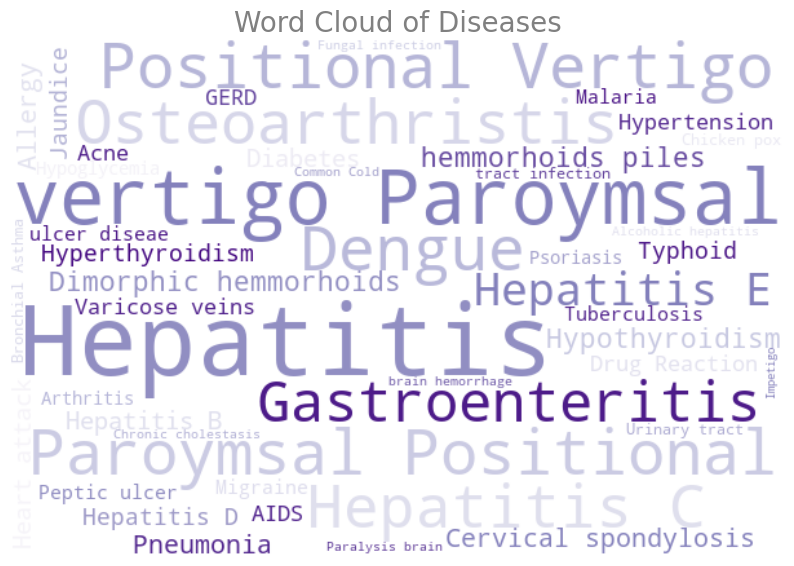

In [16]:
#fifth visualization

Diseases = " ".join(sample_data['Disease'].dropna().astype(str))  #it takes one string only not list or columns and dropna() for Nan values
wordcloud = WordCloud(width=600, height=400, background_color='white',colormap='Purples').generate(Diseases)

plt.figure(figsize=(10, 8))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Diseases",color='grey',fontsize=20)

plt.show()
